# Node2vec

~Rakshita Mathur

In [1]:
import networkx as nx
import random
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from node2vec import Node2Vec

In [2]:

# Create an empty graph
G = nx.Graph()

# Add nodes to the graph
num_nodes = 100  # Adjust the number of nodes as needed
G.add_nodes_from(range(num_nodes))

# Add random edges to the graph
num_edges = 200  # Adjust the number of edges as needed
for _ in range(num_edges):
    node1 = random.randint(0, num_nodes - 1)
    node2 = random.randint(0, num_nodes - 1)
    G.add_edge(node1, node2)


In [3]:

# Create a Node2Vec object
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, p=1.0, q=1.0, workers=4)

# Fit the Node2Vec model to the graph
model = node2vec.fit(window=10, min_count=1)


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

In [4]:
embedding = model.wv['0']
embedding

array([ 0.36336473,  0.09151082,  0.3033112 ,  0.05647432, -0.06911364,
        0.18362188, -0.0694751 , -0.09277473, -0.3350122 ,  0.12992555,
       -0.32216024, -0.23095429, -0.06583684, -0.33222008,  0.1455932 ,
       -0.10252815, -0.03960348,  0.04052435,  0.13106562,  0.398822  ,
        0.2283061 ,  0.07038457,  0.06218421,  0.03750778, -0.1923926 ,
        0.04184645, -0.07633216, -0.43760687,  0.05223075, -0.25676447,
       -0.33750513,  0.1403856 , -0.00714858, -0.21634726, -0.23565131,
        0.08621982,  0.16132173,  0.16244505,  0.3962626 , -0.18606383,
        0.18802078,  0.17736055, -0.22466658, -0.2031507 ,  0.16845381,
       -0.17939778,  0.26918164,  0.00392755,  0.01599963,  0.19374894,
       -0.36307997,  0.06680304, -0.26671448,  0.11462464, -0.05609248,
        0.34091613, -0.03271427, -0.21820094,  0.12315591,  0.3444295 ,
        0.0489152 ,  0.0201506 , -0.34397715,  0.36702755], dtype=float32)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


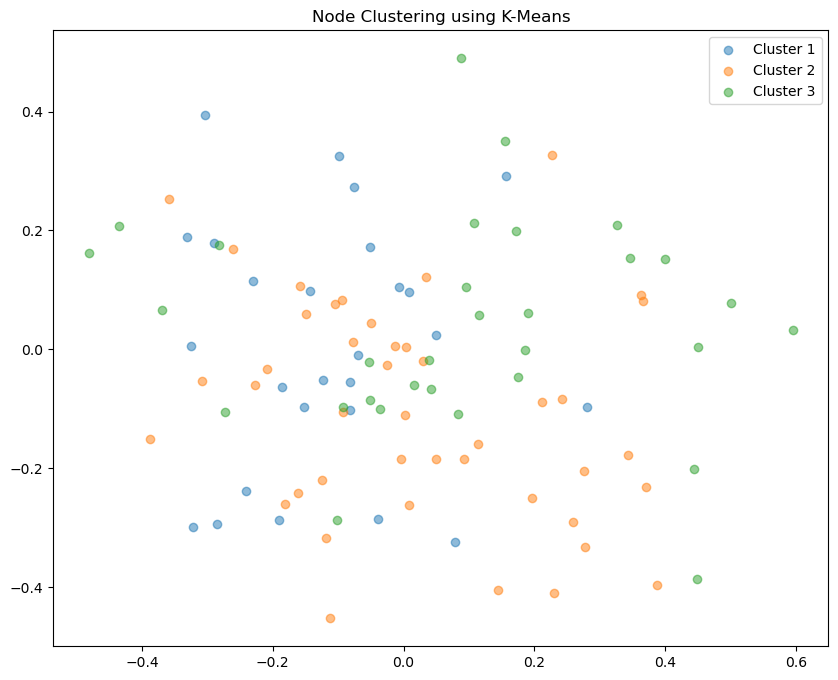

In [7]:

# Get node embeddings from the Node2Vec model
embeddings = [model.wv[str(node)] for node in G.nodes()]

# Apply K-Means clustering
num_clusters = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(embeddings)

# Visualize the clusters (assuming 2D embeddings)
plt.figure(figsize=(10, 8))
for cluster_id in range(num_clusters):
    cluster_points = [embeddings[i] for i, label in enumerate(cluster_labels) if label == cluster_id]
    cluster_points = list(zip(*cluster_points))  # Unpack the zip
    plt.scatter(cluster_points[0], cluster_points[1], label=f'Cluster {cluster_id + 1}', alpha=0.5)
plt.title('Node Clustering using K-Means')
plt.legend()
plt.show()
